In [41]:
##### IMPORTS #######
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import numpy as np
import seaborn as sns

In [12]:
######READ FILES#######
path = "/Users/tcaron/Documents/Python Scripts/KaggleS3E7/data/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
origin = pd.read_csv(path+"origin.csv")

In [13]:
train.drop(columns='id',inplace = True)
train = pd.concat([train,origin],ignore_index=True)

In [18]:
train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60232,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
60233,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
60234,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
60235,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [19]:
test

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


## Analyse Univariée

In [16]:
print(f'[INFO] Shapes:'
      f'\n[+] origin -> {origin.shape}'
      f'\n[+] train -> {train.shape}'
      f'\n[+] test -> {test.shape}\n')

print(f'[INFO] Any missing values:'
      f'\n[+] origin -> {origin.isna().any().any()}'
      f'\n[+] train -> {train.isna().any().any()}'
      f'\n[+] test -> {test.isna().any().any()}')

[INFO] Shapes:
[+] origin -> (18137, 18)
[+] train -> (60237, 18)
[+] test -> (28068, 18)

[INFO] Any missing values:
[+] origin -> False
[+] train -> False
[+] test -> False


0    62.74
1    37.26
Name: booking_status, dtype: float64

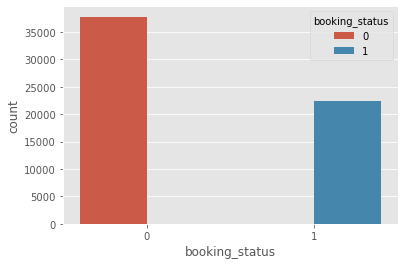

In [28]:
sns.countplot(x = 'booking_status', hue = 'booking_status', data = train);
round(100*train['booking_status'].value_counts() / train.shape[0], 2) 


In [31]:
varQuant = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']
varQual = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','arrival_year','arrival_month','arrival_date','market_segment_type',
            'repeated_guest','booking_status']

In [32]:
dfQuant = train[varQuant]
dfQual = train[varQual]

In [33]:
dfQuant.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000
mean,1.898451,0.130983,0.862493,2.341086,98.314591,0.020536,0.168435,104.238935,0.585521
std,0.523373,0.438391,0.882668,1.429660,83.210861,0.339763,1.726747,36.648888,0.779224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,80.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,81.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,150.000000,0.000000,0.000000,122.400000,1.000000
max,4.000000,9.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000


#fréquences et nombre de valeurs pour les variables qualitatives

for col in dfQual.columns:
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True))
    print("\n")

In [35]:
#trop peu d'elements pour les variables repeated_guest, à verifier
#train = train.drop("repeated_guest",axis=1)

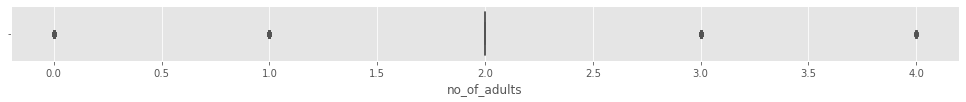

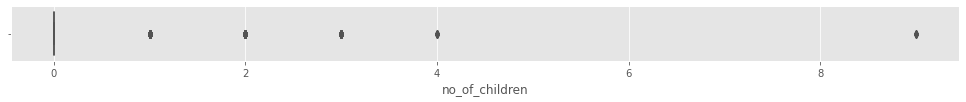

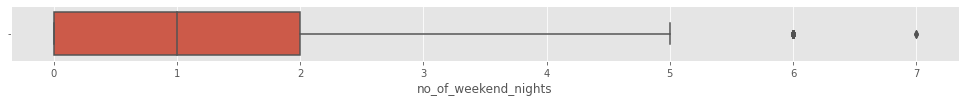

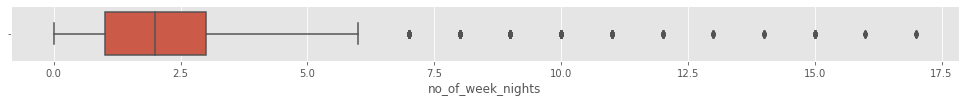

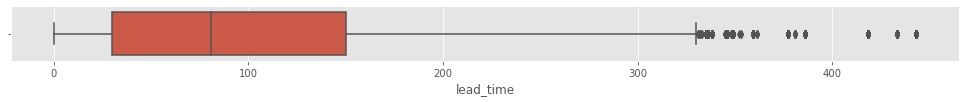

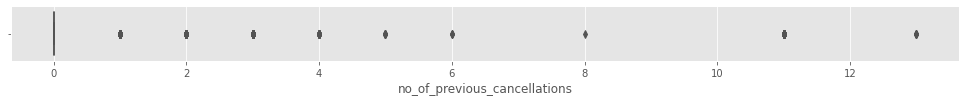

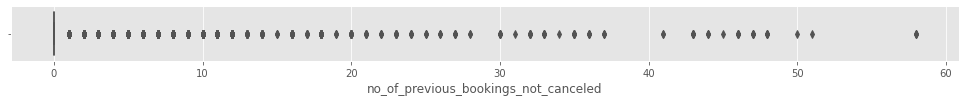

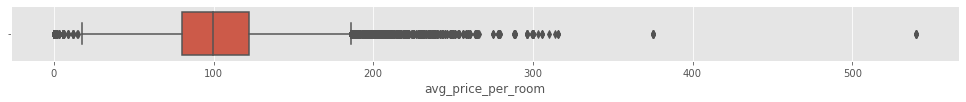

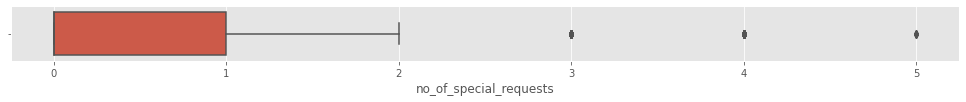

In [43]:
#Création de boites à moustaches pour les variables quantitatives

for column in dfQuant:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dfQuant, x=column)

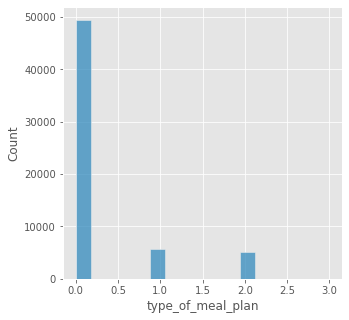

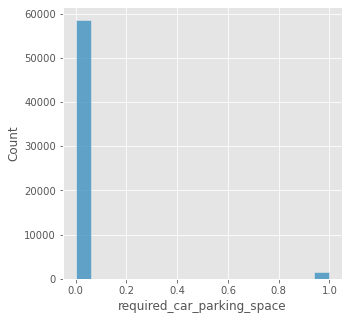

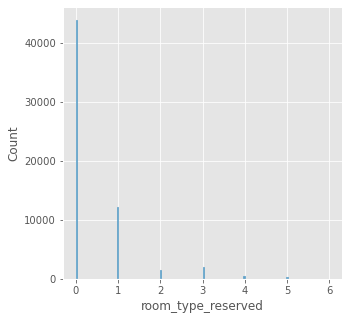

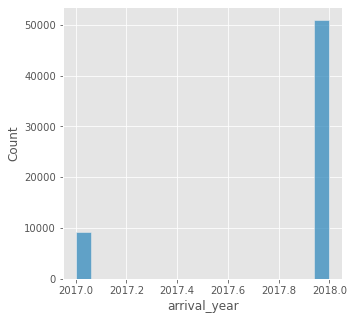

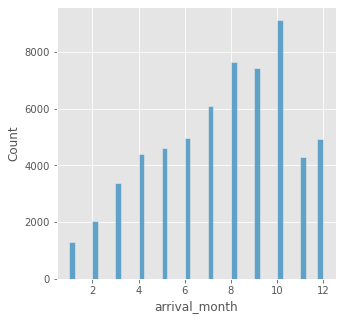

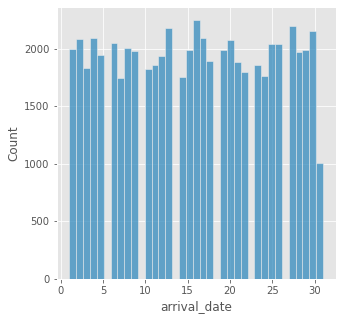

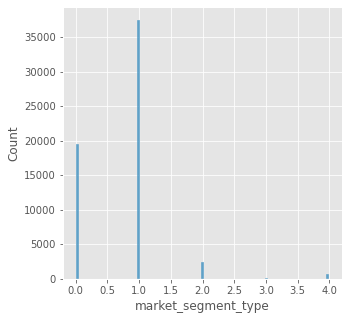

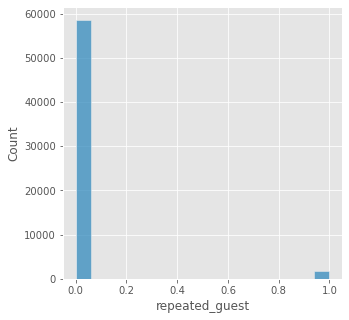

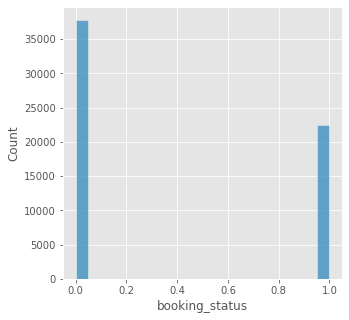

In [46]:
#Création d'histogramme pour les variables qualitatives

for column in dfQual:
    plt.figure(figsize=(5,5))
    sns.histplot(data=dfQual, x=column)

### Fin de l'analyse Univariée : Aucun changement retenu

## Analyse Bivariée

In [48]:
#Création de la matrice de corrélation 

matCorr = dfQuant.corr()
matCorr.style.background_gradient(cmap='coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.025381,0.081571,0.092108,0.095686,-0.060066,-0.142433,0.312427,0.181376
no_of_children,-0.025381,1.000000,-0.004508,-0.024453,-0.117349,-0.015049,-0.025811,0.363185,0.153242
no_of_weekend_nights,0.081571,-0.004508,1.000000,0.190208,0.070676,-0.026511,-0.032817,-0.030360,0.034875
no_of_week_nights,0.092108,-0.024453,0.190208,1.000000,0.115071,-0.033081,-0.059492,0.009124,0.032381
lead_time,0.095686,-0.117349,0.070676,0.115071,1.000000,-0.058469,-0.106081,-0.093951,-0.059765
no_of_previous_cancellations,-0.060066,-0.015049,-0.026511,-0.033081,-0.058469,1.000000,0.436922,-0.064601,-0.006539
no_of_previous_bookings_not_canceled,-0.142433,-0.025811,-0.032817,-0.059492,-0.106081,0.436922,1.000000,-0.124993,0.012095
avg_price_per_room,0.312427,0.363185,-0.030360,0.009124,-0.093951,-0.064601,-0.124993,1.000000,0.199458
no_of_special_requests,0.181376,0.153242,0.034875,0.032381,-0.059765,-0.006539,0.012095,0.199458,1.000000


['booking_status:0.9999289885662027', 'market_segment_type:0.06166312318940105', 'arrival_month:0.04723795935942436', 'arrival_year:0.03302892089063292', 'repeated_guest:0.016089808573747873', 'required_car_parking_space:0.008770514338559642', 'arrival_date:0.006362398486899191', 'type_of_meal_plan:0.004335250901923116', 'room_type_reserved:0.0021577815910995154']


C:\Users\tcaron\AppData\Local\Temp/ipykernel_15116/827245145.py:45: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataCr, dtype=np.bool)


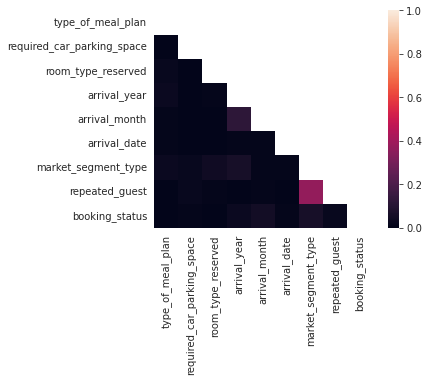

In [50]:
#Methode 1
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0]  
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []
liste_v_cramer = []

def tri_bulle(tableau):
    for i in range(len(tableau)-1,0,-1):
        for j in range(i):
            index = (tableau[j]).find(':')
            indexbis = (tableau[j+1]).find(':')
            if float(tableau[j][index+1:]) < float(tableau[(j+1)][indexbis+1:]):
                tableau[j+1], tableau[j] = tableau[j], tableau[j+1]
    return tableau


for var1 in dfQual:
    cramers_tychd = cramers_V(dfQual[var1], dfQual["booking_status"])
    liste_v_cramer.append(str(dfQual[var1].name+":"+str(cramers_tychd)))
    col = []
    for var2 in dfQual :
        cramers =cramers_V(dfQual[var1], dfQual[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
dataCr = pd.DataFrame(cramers_results, columns = dfQual.columns, index =dfQual.columns)

tri_bulle(liste_v_cramer)
print(liste_v_cramer)

dataCr

mask = np.zeros_like(dataCr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
  ax = sns.heatmap(dataCr, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [54]:
def rapport_corr(x,y):
    '''x est une variable qualitative
    y est une variable quantitative
    '''
    somme = 0
    for facteur in x.value_counts().index:
        ind = x[x == facteur].dropna(axis=0).index
        classe = y.iloc[ind,]
        somme = somme + len(classe)*np.sum((np.mean(classe)-np.mean(y))**2)
        y_ecart = np.sum((y-np.mean(y))**2)
    rc = somme/y_ecart
    #rc.index = ['Rapport de Correlation']
    return rc

In [59]:
for x in dfQuant:
    for y in dfQual:
        if(rapport_corr(train[x],train[y])>0.6):
            print(rapport_corr(train[x],train[y]),x,y)

0.8958398185739778 no_of_previous_bookings_not_canceled repeated_guest
0.6138429447167867 avg_price_per_room room_type_reserved


### Fin de l'analyse Bivariée, aucun changement retenu